## Step 3 - Climate Analysis and Exploration

You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.


* Create a Jupyter Notebook file called climate_analysis.ipynb and use it to complete your climate analysis and data exporation.
* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.
* Use SQLAlchemy create_engine to connect to your sqlite database.
* Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and measurement

In [1]:
# Importing Dependancies, SQLAlchemy, ORM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
import datetime as dt
import matplotlib
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey



In [2]:
#Creating engine using Hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)


In [4]:
#Check to see what was mapped
Base.classes.keys()

['measurements', 'station']

In [5]:
 # Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'station']

In [6]:
#display data for station table
engine.execute('Select * from station limit 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', -157.8168, 21.2716, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', -157.8015, 21.4234, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', -157.8374, 21.5213, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', -157.9751, 21.3934, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', -158.0111, 21.4992, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', -157.71139, 21.33556, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', -157.84888999999998, 21.45167, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', -157.9992, 21.3152, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', -157.8025, 21.3331, 152.4)]

In [7]:
#display data for measurements table
engine.execute('Select * from measurements limit 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70),
 (6, 'USC00519397', '2010-01-08', 0.0, 64),
 (7, 'USC00519397', '2010-01-09', 0.0, 68),
 (8, 'USC00519397', '2010-01-10', 0.0, 73),
 (9, 'USC00519397', '2010-01-11', 0.01, 64),
 (10, 'USC00519397', '2010-01-12', 0.0, 61)]

In [8]:
#Reflect both databases into ORM
station = Base.classes.station
measurements = Base.classes.measurements

In [9]:
#Start session to query database
session = Session(engine)

### Precipitation Analysis


* Design a query to retrieve the last 12 months of precipitation data.
* Select only the date and prcp values.
* Load the query results into a Pandas DataFrame and set the index to the date column.
* Plot the results using the DataFrame plot method.
* Use Pandas to print the summary statistics for the precipitation data

In [10]:
recent = session.query(measurements.date).order_by(measurements.date.desc()).first()
print(recent)

('2017-08-23',)


In [11]:
#Get 12 months of data
rec_year = dt.date(2017,8,23) - dt.timedelta(days = 365)
#print(rec_year)
#Run the query
rec_rain = session.query(measurements.date, measurements.prcp).filter(measurements.date > rec_year).\
order_by(measurements.date).all()

In [12]:
rec_rain_df = pd.DataFrame(rec_rain)
rec_rain_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,1.22
4,2016-08-24,2.15


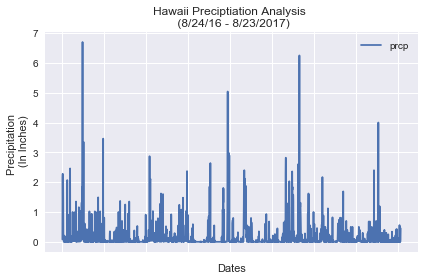

In [23]:
#Plot the data
rain_plot = rec_rain_df.plot('date', 'prcp')
plt.xlabel('date')
plt.setp(rain_plot.xaxis.get_label(), visible=True, text='Dates')
plt.ylabel('Precipitation \n (In Inches)')
plt.title('Hawaii Preciptiation Analysis \n (8/24/16 - 8/23/2017)')
plt.tight_layout()
plt.show()
#could not get xaxis ticks to show for some reason. Decided to move on and continue the assignment

In [24]:
rec_rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis


* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

    * list the stations and observation counts in descending order
    * Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).
    * Filter by the station with the highest number of observations.
    * Plot the results as a histogram with bins=12.

In [26]:
#Query for count of stations
total_station = session.query(station).group_by(station.station).count()
print('There are {} stations'.format(total_station))

There are 9 stations


In [37]:
#Most Active stations
bstation = session.query(measurements.station, func.count(measurements.tobs)).group_by(measurements.station).order_by(func.count(measurements.tobs).desc()).all()

In [41]:
bstation
busy_stat = bstation[0][0]

USC00519281 was the busiest station

In [42]:
# Pull temp data for busiest station 
temp = session.query(measurements.station, measurements.date, measurements.tobs).filter(measurements.station==busy_stat).filter(measurements.date>rec_year).order_by(measurements.date).all()

In [43]:
#Creating DataFrame from temp to plot
temp_df = pd.DataFrame(temp)

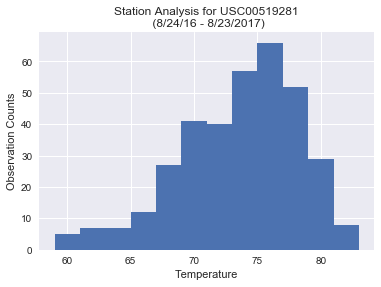

In [47]:
#Plot Attributes
plt.hist(temp_df['tobs'],12)
plt.xlabel("Temperature")
plt.ylabel("Observation Counts")
plt.title("Station Analysis for " + busy_stat + "\n (8/24/16 - 8/23/2017)")
plt.show()

## Temperature Analysis

In [51]:
#Write a function called calc_temps that will accept a start date and end date in the 
#format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

def calc_temps(start_date, end_date):
    #func.min(measurements.tobs)
    #func.max(measurements.tobs)
    #func.avg(measurements.tobs)
    
    return session.query(func.min(measurements.tobs), func.max(measurements.tobs), func.avg(measurements.tobs))\
                         .filter(measurements.date >=start_date).filter(measurements.date <= end_date).all()
                         

In [56]:
#trip calculations
trip_start = dt.date(2017, 12, 18)
trip_end = dt.date(2017, 12, 22)
lyear = dt.timedelta(days=365)
temps = (calc_temps((trip_start - lyear), (trip_end - lyear)))
print(temps)

[(67, 78, 73.0)]


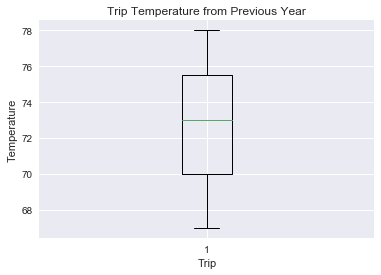

In [59]:
#plotting

fig, ax = plt.subplots()
x = range(len(temps))
ax.boxplot(temps)
ax.set_title("Trip Temperature from Previous Year")
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")
plt.show()